In [2]:
import pandas as pd
# import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import os
import glob
import csv
from functools import reduce


Using TensorFlow backend.


In [3]:
SET50 = ['Date', 'ADVANC', 'AOT', 'BANPU', 'BBL', 'BCP', 'BDMS',
        'BEM', 'BH', 'BJC', 'BTS', 'CENTEL', 'CPALL', 
         'CPF', 'CPN', 'DTAC', 'EGCO', 'GLOBAL', 'HMPRO', 
         'INTUCH', 'IRPC', 'KBANK', 'KCE', 'KKP', 'KTB', 'LH', 'MINT', 'PTT',
        'PTTEP', 'ROBINS', 'SCB', 'SCC', 
        'TCAP', 'TISCO', 'TMB', 'TOP', 'TRUE', 'TU']

In [4]:
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

In [116]:
path =r'./SET50'
allFiles = glob.glob(path + "/*.csv")
frames = [pd.read_csv(
    f, 
    usecols=[0, 4],
    index_col=0, 
    parse_dates=True,
    header=0,
    names=['date', os.path.basename(f).split('.')[0]],
    ).round(1) for f in allFiles if "" in f]

In [117]:
frames

[            ADVANC
 date              
 2000-01-04    43.4
 2000-01-05    40.6
 2000-01-06    38.6
 2000-01-07    38.6
 2000-01-10    40.0
 2000-01-11    39.4
 2000-01-12    39.4
 2000-01-13    38.8
 2000-01-14    40.6
 2000-01-17    41.2
 2000-01-18    41.0
 2000-01-19    39.6
 2000-01-20    39.6
 2000-01-21    40.0
 2000-01-24    40.8
 2000-01-25    39.2
 2000-01-26    39.0
 2000-01-27    38.6
 2000-01-28    39.0
 2000-01-31    38.6
 2000-02-01    39.0
 2000-02-02    39.2
 2000-02-03    39.2
 2000-02-04    39.4
 2000-02-07    38.8
 2000-02-08    38.6
 2000-02-09    40.2
 2000-02-10    40.2
 2000-02-11    43.0
 2000-02-14    43.0
 ...            ...
 2017-08-04   188.0
 2017-08-07   182.5
 2017-08-08   184.0
 2017-08-09   184.0
 2017-08-10   182.5
 2017-08-11   178.5
 2017-08-15   178.5
 2017-08-16   180.0
 2017-08-17   180.0
 2017-08-18   180.0
 2017-08-21   181.0
 2017-08-22   181.5
 2017-08-23   180.0
 2017-08-24   180.0
 2017-08-25   182.5
 2017-08-28   185.0
 2017-08-29   188.0


In [46]:
# frames = []
# for key, value in d.items():
#     value.columns = ['Date', key]
#     frames.append(value)

In [118]:
df = frames[0]
for df_ in frames[1:]:
    df = df.merge(df_, how='outer', left_index=True, right_index=True)

(4430, 1) (666, 1)
            ADVANC   CBG
date                    
2000-01-04    43.4   NaN
2000-01-05    40.6   NaN
2000-01-06    38.6   NaN
2000-01-07    38.6   NaN
2000-01-10    40.0   NaN
2000-01-11    39.4   NaN
2000-01-12    39.4   NaN
2000-01-13    38.8   NaN
2000-01-14    40.6   NaN
2000-01-17    41.2   NaN
2000-01-18    41.0   NaN
2000-01-19    39.6   NaN
2000-01-20    39.6   NaN
2000-01-21    40.0   NaN
2000-01-24    40.8   NaN
2000-01-25    39.2   NaN
2000-01-26    39.0   NaN
2000-01-27    38.6   NaN
2000-01-28    39.0   NaN
2000-01-31    38.6   NaN
2000-02-01    39.0   NaN
2000-02-02    39.2   NaN
2000-02-03    39.2   NaN
2000-02-04    39.4   NaN
2000-02-07    38.8   NaN
2000-02-08    38.6   NaN
2000-02-09    40.2   NaN
2000-02-10    40.2   NaN
2000-02-11    43.0   NaN
2000-02-14    43.0   NaN
...            ...   ...
2017-08-04   188.0  70.2
2017-08-07   182.5  69.0
2017-08-08   184.0  68.5
2017-08-09   184.0  68.0
2017-08-10   182.5  69.5
2017-08-11   178.5  70.0
2017-0

            ADVANC   CBG  BTS  INTUCH    EA    SCC   CPN  TMB   KKP  PTTEP  \
date                                                                         
1995-01-03     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-04     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-05     NaN   NaN  NaN    30.5   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-06     NaN   NaN  NaN    30.1   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-09     NaN   NaN  NaN    29.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-10     NaN   NaN  NaN    28.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-11     NaN   NaN  NaN    27.8   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-12     NaN   NaN  NaN    27.0   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-13     NaN   NaN  NaN    26.6   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-16     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-17     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   

            ADVANC   CBG  BTS  INTUCH    EA    SCC   CPN  TMB   KKP  PTTEP  \
date                                                                         
1995-01-03     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-04     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-05     NaN   NaN  NaN    30.5   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-06     NaN   NaN  NaN    30.1   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-09     NaN   NaN  NaN    29.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-10     NaN   NaN  NaN    28.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-11     NaN   NaN  NaN    27.8   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-12     NaN   NaN  NaN    27.0   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-13     NaN   NaN  NaN    26.6   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-16     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-17     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   

            ADVANC   CBG  BTS  INTUCH    EA    SCC   CPN  TMB   KKP  PTTEP  \
date                                                                         
1995-01-03     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-04     NaN   NaN  NaN    30.4   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-05     NaN   NaN  NaN    30.5   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-06     NaN   NaN  NaN    30.1   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-09     NaN   NaN  NaN    29.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-10     NaN   NaN  NaN    28.7   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-11     NaN   NaN  NaN    27.8   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-12     NaN   NaN  NaN    27.0   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-13     NaN   NaN  NaN    26.6   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-16     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   NaN    NaN   
1995-01-17     NaN   NaN  NaN    26.3   NaN    NaN   NaN  NaN   

            ADVANC   CBG  BTS  INTUCH    EA    SCC   CPN  TMB   KKP  PTTEP  \
date                                                                         
1994-08-02     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-03     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-04     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-05     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-08     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-09     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-10     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-11     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-12     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-15     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   NaN    NaN   
1994-08-16     NaN   NaN  NaN     NaN   NaN    NaN   NaN  NaN   

In [120]:
df

,ADVANC,CBG,BTS,INTUCH,EA,SCC,CPN,TMB,KKP,PTTEP,...,KTB,SCB,HMPRO,IVL,BCP,BDMS,TCAP,PTTGC,ROBINS,BBL
date,,,,,,,,,,,,,,,,,,,,,
1994-08-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,48.5,NaN,NaN,NaN,NaN,NaN
1994-08-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53.0,NaN,NaN,NaN,NaN,NaN
1994-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,54.0,NaN,NaN,NaN,NaN,NaN
1994-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,52.5,NaN,NaN,NaN,NaN,NaN
1994-08-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,51.5,NaN,NaN,NaN,NaN,NaN
1994-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,53.5,NaN,NaN,NaN,NaN,NaN
1994-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,56.0,NaN,NaN,NaN,NaN,NaN
1994-08-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN
1994-08-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.dropna()

,ADVANC,CBG,BTS,INTUCH,EA,SCC,CPN,TMB,KKP,PTTEP,...,KTB,SCB,HMPRO,IVL,BCP,BDMS,TCAP,PTTGC,ROBINS,BBL
date,,,,,,,,,,,,,,,,,,,,,
2017-08-15,178.5,71.5,8.4,57.0,36.2,490.0,67.2,2.3,67.2,86.0,...,17.8,144.0,9.8,38.2,36.2,19.8,46.0,71.0,54.8,180.5
2017-08-16,180.0,71.8,8.4,55.5,36.0,496.0,66.8,2.3,67.0,84.8,...,17.8,141.0,9.8,38.2,37.5,19.9,46.5,72.5,54.0,178.5
2017-08-17,180.0,71.8,8.5,55.2,35.2,496.0,66.2,2.3,67.5,84.2,...,17.9,142.0,9.8,38.0,38.8,20.0,46.2,73.8,54.0,179.0
2017-08-18,180.0,68.5,8.6,55.2,34.0,492.0,66.0,2.3,67.2,84.5,...,17.9,142.5,9.8,37.8,38.2,20.2,46.2,73.8,54.0,179.5
2017-08-21,181.0,66.2,8.6,55.2,34.8,488.0,67.5,2.3,68.8,86.2,...,18.2,142.5,9.8,38.0,38.8,19.9,46.2,74.0,53.8,181.0
2017-08-22,181.5,67.0,8.6,55.0,35.0,492.0,66.2,2.3,69.0,85.5,...,18.4,143.5,9.8,38.2,37.8,19.8,46.2,74.8,54.2,183.5
2017-08-23,180.0,66.5,8.5,55.5,34.0,490.0,66.8,2.3,68.5,85.5,...,18.2,144.5,9.8,38.0,37.8,19.8,46.2,74.2,53.8,183.5
2017-08-24,180.0,66.8,8.5,55.5,34.0,488.0,68.0,2.3,69.5,85.8,...,18.3,144.5,9.8,38.0,38.0,20.5,46.2,74.2,53.8,181.5
2017-08-25,182.5,67.0,8.5,55.8,35.0,484.0,67.2,2.4,69.2,85.5,...,18.2,144.0,9.8,38.2,38.0,20.4,46.0,74.0,53.8,181.5


In [125]:
df.isnull().sum()

ADVANC    1639
CBG       5223
BTS       2942
INTUCH    4186
EA        4894
SCC       1703
CPN       3826
TMB       1608
KKP       1737
PTTEP     3885
TOP       2875
BPP       5628
TISCO     3881
BEM       3160
GPSC      5272
IRPC      2085
CENTEL    2544
AOT       2713
TRUE      1422
TU        4828
EGCO      1603
PTT       2127
KCE       2833
BANPU     1422
BH        2712
CPF       1664
LH        2650
CPALL     4276
MINT      1911
GLOBAL    3871
BJC       2514
DTAC      3527
BEAUTY    5220
KBANK     1600
KTB       3746
SCB       1602
HMPRO     1913
IVL       4168
BCP        437
BDMS      2563
TCAP      1664
PTTGC     4583
ROBINS    2925
BBL       1609
dtype: int64

In [199]:
# scaler = MinMaxScaler(feature_range=(0, 1))
# np_scaled = scaler.fit_transform(df.ix[:,1:])
# df_normalized = pd.DataFrame(np_scaled)

C:\Users\asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [126]:

train , test , data , target = [] , [] , [] , []
for key, value in d.items():
    d[key] = np.reshape(value.values, (len(value),1))
    d[key] = scaler.fit_transform(value)
    train.append(int(len(d[key])*0.8))
    test.append(len(d[key]) - int(len(d[key])*0.8))
    data.append(d[key][0:int(len(d[key])*0.8),:])
    target.append(d[key][int(len(d[key])*0.8):len(d[key]),:])

NameError: name 'd' is not defined

In [9]:
x_train , y_train , x_test , y_test = [] , [] , [] , []
for value in data:
    x_train.append(new_dataset(value,1))
    y_train.append(new_dataset(value,1))
for value in target:
    x_test.append(new_dataset(value,1))
    y_test.append(new_dataset(value,1))

In [10]:
for index, value in enumerate(x_train):
    x_train[index] = np.reshape(x_train[index][0], (x_train[index][0].shape[0], 1, x_train[index][0].shape[1]))
for index, value in enumerate(x_test):
    x_test[index] = np.reshape(x_test[index][0], (x_test[index][0].shape[0], 1, x_test[index][0].shape[1]))

In [30]:
print('Shape of x_train')
for index, value in enumerate(x_train):
    print(x_train[index].shape)
print('\nShape of  x_test')
for index, value in enumerate(x_test):
    print(x_test[index].shape)

Shape of x_train
(3362, 1, 1)
(2503, 1, 1)
(3536, 1, 1)
(3386, 1, 1)
(4324, 1, 1)
(2623, 1, 1)
(2146, 1, 1)
(2504, 1, 1)
(2662, 1, 1)
(2320, 1, 1)
(2638, 1, 1)
(1253, 1, 1)
(3342, 1, 1)
(1613, 1, 1)
(1852, 1, 1)
(3391, 1, 1)
(1577, 1, 1)
(3143, 1, 1)
(1325, 1, 1)
(3006, 1, 1)
(3394, 1, 1)
(2407, 1, 1)
(3284, 1, 1)
(1677, 1, 1)
(2554, 1, 1)
(3145, 1, 1)
(2972, 1, 1)
(1566, 1, 1)
(2334, 1, 1)
(3392, 1, 1)
(3311, 1, 1)
(3342, 1, 1)
(1569, 1, 1)
(3387, 1, 1)
(2374, 1, 1)
(3536, 1, 1)
(811, 1, 1)

Shape of  x_test
(840, 1, 1)
(625, 1, 1)
(883, 1, 1)
(846, 1, 1)
(1080, 1, 1)
(655, 1, 1)
(535, 1, 1)
(625, 1, 1)
(665, 1, 1)
(579, 1, 1)
(659, 1, 1)
(312, 1, 1)
(835, 1, 1)
(402, 1, 1)
(462, 1, 1)
(847, 1, 1)
(393, 1, 1)
(785, 1, 1)
(330, 1, 1)
(750, 1, 1)
(847, 1, 1)
(601, 1, 1)
(820, 1, 1)
(418, 1, 1)
(637, 1, 1)
(785, 1, 1)
(742, 1, 1)
(390, 1, 1)
(582, 1, 1)
(847, 1, 1)
(827, 1, 1)
(835, 1, 1)
(391, 1, 1)
(846, 1, 1)
(592, 1, 1)
(883, 1, 1)
(202, 1, 1)


In [15]:
step_size = 1

In [29]:
x_train[1].shape

(2503, 1, 1)

In [22]:
model = Sequential()
model.add(LSTM(37, input_shape=(1, step_size), return_sequences = True))
# model.add(LSTM(16))
model.add(Dense(37))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='adagrad',metrics=['acc' , 'mse' ])

In [396]:
# history = model.fit(x_train[0], y_train[0][0], epochs=50, validation_data=(x_test[0], y_test[0][0]) , batch_size=1, verbose=2 )

In [23]:
model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) , batch_size=1, verbose=2 )

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 37 arrays: [array([[[ 0.05661713]],

       [[ 0.04670913]],

       [[ 0.03963199]],

       ..., 
       [[ 0.87968861]],

       [[ 0.89738146]],

       [[ 0.90092003]]]), array([[[ 0.10973578]],

       [[ ...

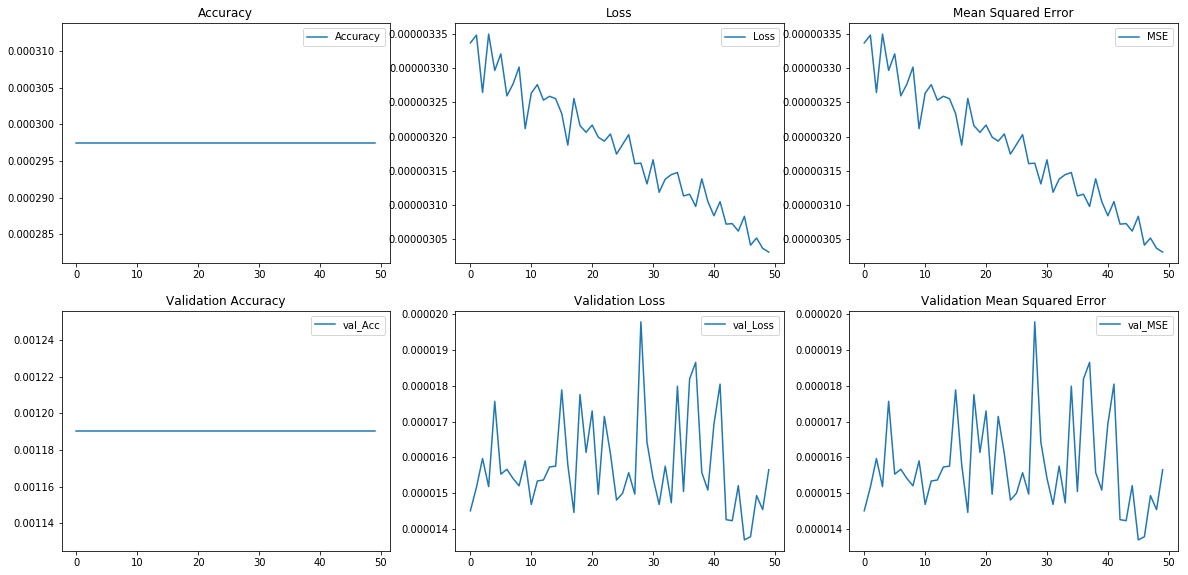

In [394]:
plt.figure(figsize=(20,15))
plt.subplot(331)
plt.plot(history.history['acc'] , label = 'Accuracy')
plt.legend(loc = 'upper right')
plt.title("Accuracy")

plt.subplot(332)
plt.plot(history.history['loss'] , label = 'Loss')
plt.legend(loc = 'upper right')
plt.title("Loss")

plt.subplot(333)
plt.plot(history.history['mean_squared_error'] , label = 'MSE')
plt.legend(loc = 'upper right')
plt.title("Mean Squared Error")

plt.subplot(334)
plt.plot(history.history['val_acc'] , label = 'val_Acc')
plt.legend(loc = 'upper right')
plt.title("Validation Accuracy")

plt.subplot(335)
plt.plot(history.history['val_loss'] , label = 'val_Loss')
plt.legend(loc = 'upper right')
plt.title("Validation Loss")

plt.subplot(336)
plt.plot(history.history['val_mean_squared_error'] , label = 'val_MSE')
plt.legend(loc = 'upper right')
plt.title("Validation Mean Squared Error")

plt.show()

In [474]:
trainPredict = model.predict(x_train[0])
testPredict = model.predict(x_test[0])

In [475]:
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)
y_train[0] = scaler.inverse_transform(y_train[0][0])
y_test[0] = scaler.inverse_transform(y_test[0][0])

In [476]:
trainScore = mean_squared_error(y_train[0], trainPredict[:,0])
print('Train RMSE: %.2f' % (trainScore))
testScore = mean_squared_error(y_test[0], testPredict[:,0])
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 0.00
Test RMSE: 0.01


In [478]:
trainPredictPlot = np.empty_like(d['ADVANC'])
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

testPredictPlot = np.empty_like(d['ADVANC'])
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(close_val)-1, :] = testPredict

In [479]:
d['ADVANC'] = scaler.inverse_transform(d['ADVANC'])

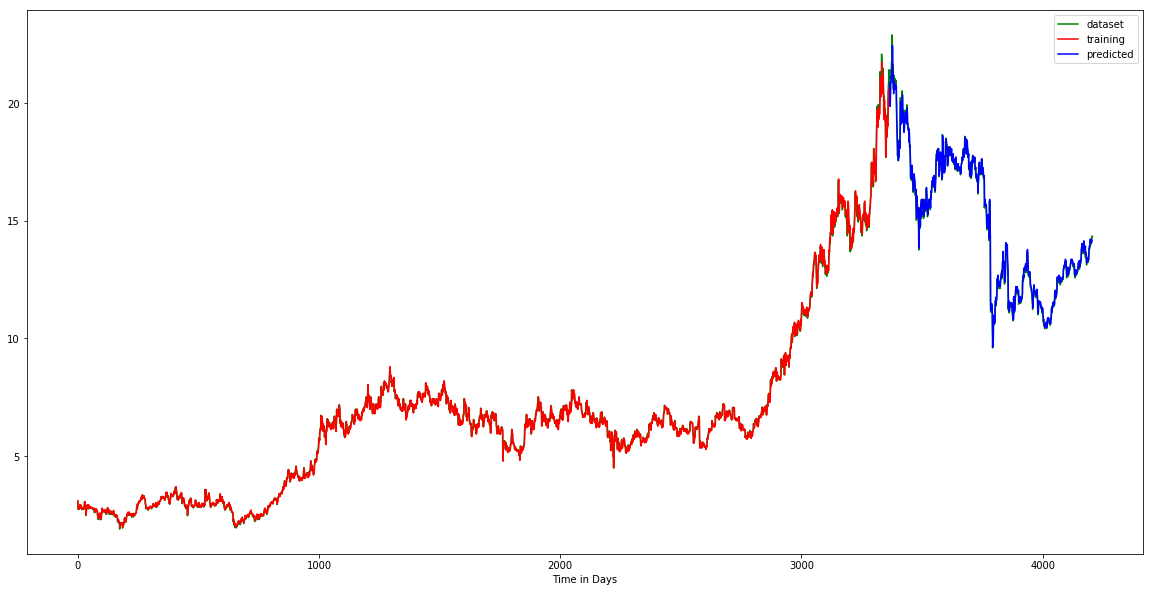

In [480]:
plt.figure(figsize=(20,10))
plt.plot(d['ADVANC'], 'g', label = 'dataset')
plt.plot(trainPredictPlot, 'r', label = 'training')
plt.plot(testPredictPlot, 'b', label = 'predicted')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.show()